## Setup

In [2]:
# ---------------- Imports ----------------
import os

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd

import mars_dtc as mdt


In [3]:
# ---------------- Args ----------------
input_data_file = "mars_weather_data.csv"



## Basic Features

### Basic Construction and Display

Calendar specification (Note, only Darian currently supported)

In [4]:
d_custom = mdt.MarsDate(214, 5, 12, calendar=mdt.DarianCalendar())
d_custom

DarianCalendarDate(214, 5, 12)

From integers

In [5]:
mdt.MarsDate(214, 14, 28)

DarianCalendarDate(214, 14, 28)

From string

In [6]:
mdt.MarsDate.from_string("214-14-28")


DarianCalendarDate(214, 14, 28)

In [7]:
mdt.MarsDate.from_string("214/14/28")


DarianCalendarDate(214, 14, 28)

In [8]:
mdt.MarsDate.from_string("214.14.28")

DarianCalendarDate(214, 14, 28)

Negatives Years

In [9]:
mdt.MarsDate.from_string("-214-14-28")


DarianCalendarDate(-214, 14, 28)

In [10]:
mdt.MarsDate.from_string("-214/14/28")


DarianCalendarDate(-214, 14, 28)

In [11]:
mdt.MarsDate.from_string("-214.14.28")

DarianCalendarDate(-214, 14, 28)

Ordinals

In [12]:
# From ordinal
ord_val = mdt.MarsDate(214, 12, 10).to_ordinal()

ord_val

143395

In [13]:
mdt.MarsDate.from_ordinal(ord_val)


DarianCalendarDate(214, 12, 10)

In [14]:
# From ordinal
ord_val = mdt.MarsDate(-214, 12, 10).to_ordinal()

ord_val

-142762

In [15]:
mdt.MarsDate.from_ordinal(ord_val)


DarianCalendarDate(-214, 12, 10)

Formats


- %Y   → full year (with sign)
- %y   → last 2 digits of year
- %m   → numeric month (01–24)
- %b   → abbreviated month (Sag → Sag, Dhan → Dha, etc.)
- %B   → full month name (Sagittarius)
- %d   → sol number (01–28)
- %A   → full weekday name (Sol Jovis)
- %a   → abbreviated weekday (Jov)


In [16]:
mdate = mdt.MarsDate(214, 14, 28)


print(mdate.format("%Y/%m/%d"))       # 0214/14/28
print(mdate.format("%b %d, %Y"))      # Mit 28, 0214
print(mdate.format("%B %d, %Y"))      # Mithuna 28, 0214
print(mdate.format("%A, %B %d, %Y"))  # Sol Jovis, Mithuna 28
print(mdate.format("%a, %b %d, %Y"))  # Jov, Mit 28, 0214


214/14/28
Mit 28, 214
Mithuna 28, 214
Sol Mercurii, Mithuna 28, 214
Mer, Mit 28, 214


Equality and comparison

In [17]:
mdate1 = mdt.MarsDate(214, 20, 2) # larger
mdate2 = mdt.MarsDate(214, 14, 28)

mdate1 == mdate2


False

In [18]:
mdate1 < mdate2


False

In [19]:
mdate1 > mdate2


True

In [20]:
mdate1 <= mdate2


False

In [21]:
mdate1 != mdate2


True

In [22]:
mdate2 > mdate1


False

In [23]:
sorted([mdate2, mdate1])

[DarianCalendarDate(214, 14, 28), DarianCalendarDate(214, 20, 2)]

Hashability

In [24]:
dates_dict = {mdate1: "start", mdate2: "mid"}
dates_dict[mdate2]

'mid'

From JSON or YAML

In [25]:
mdt.MarsDate.from_json(mdate2.to_json())


DarianCalendarDate(214, 14, 28)

In [26]:
mdt.MarsDate.from_yaml(mdate2.to_yaml())

DarianCalendarDate(214, 14, 28)

In [27]:
mdate2 = mdt.MarsDate(214, 20, 2)
j = mdate2.to_json()
y = mdate2.to_yaml()

print("JSON:", j)
print("YAML:", y)

assert mdt.MarsDate.from_json(j) == mdate2
assert mdt.MarsDate.from_yaml(y) == mdate2


JSON: {"year": 214, "month": 20, "sol": 2, "calendar": "DarianCalendar"}
YAML: calendar: DarianCalendar
month: 20
sol: 2
year: 214



Display in different formats

In [28]:
print("String:", str(mdate2))
print("Repr:", repr(mdate2))
print("ISO:", mdate2.isoformat())
print("Dict:", mdate2.to_dict())
print("JSON:", mdate2.to_json())
print("YAML:", mdate2.to_yaml())

String: 214/20/02
Repr: DarianCalendarDate(214, 20, 2)
ISO: +0214-20-02
Dict: {'year': 214, 'month': 20, 'sol': 2, 'calendar': 'DarianCalendar'}
JSON: {"year": 214, "month": 20, "sol": 2, "calendar": "DarianCalendar"}
YAML: calendar: DarianCalendar
month: 20
sol: 2
year: 214



### Utilities

Date range generation

In [29]:
mdt.mars_date_range(start="0214/14/25", end="0214/15/10", freq="sol")



[DarianCalendarDate(214, 14, 25),
 DarianCalendarDate(214, 14, 26),
 DarianCalendarDate(214, 14, 27),
 DarianCalendarDate(214, 14, 28),
 DarianCalendarDate(214, 15, 1),
 DarianCalendarDate(214, 15, 2),
 DarianCalendarDate(214, 15, 3),
 DarianCalendarDate(214, 15, 4),
 DarianCalendarDate(214, 15, 5),
 DarianCalendarDate(214, 15, 6),
 DarianCalendarDate(214, 15, 7),
 DarianCalendarDate(214, 15, 8),
 DarianCalendarDate(214, 15, 9),
 DarianCalendarDate(214, 15, 10)]

Range with frequency in months/years

In [30]:
mdt.mars_date_range("214/01/01", "215/01/01", freq="month")



[DarianCalendarDate(214, 1, 1),
 DarianCalendarDate(214, 2, 1),
 DarianCalendarDate(214, 3, 1),
 DarianCalendarDate(214, 4, 1),
 DarianCalendarDate(214, 5, 1),
 DarianCalendarDate(214, 6, 1),
 DarianCalendarDate(214, 7, 1),
 DarianCalendarDate(214, 8, 1),
 DarianCalendarDate(214, 9, 1),
 DarianCalendarDate(214, 10, 1),
 DarianCalendarDate(214, 11, 1),
 DarianCalendarDate(214, 12, 1),
 DarianCalendarDate(214, 13, 1),
 DarianCalendarDate(214, 14, 1),
 DarianCalendarDate(214, 15, 1),
 DarianCalendarDate(214, 16, 1),
 DarianCalendarDate(214, 17, 1),
 DarianCalendarDate(214, 18, 1),
 DarianCalendarDate(214, 19, 1),
 DarianCalendarDate(214, 20, 1),
 DarianCalendarDate(214, 21, 1),
 DarianCalendarDate(214, 22, 1),
 DarianCalendarDate(214, 23, 1),
 DarianCalendarDate(214, 24, 1),
 DarianCalendarDate(215, 1, 1)]

In [31]:
mdt.mars_date_range("214/01/01", "216/01/01", freq="year")


[DarianCalendarDate(214, 1, 1),
 DarianCalendarDate(215, 1, 1),
 DarianCalendarDate(216, 1, 1)]

Generate dataframe of all sols in a Martian year

In [32]:
year_214 = mdt.mars_date_range("0214/01/01", "215/24/28", freq="sol")
all_sols = pd.DataFrame({"MarsDate": year_214})

display(all_sols.head())
display(all_sols.tail())


,MarsDate
0,214/01/01
1,214/01/02
2,214/01/03
3,214/01/04
4,214/01/05


,MarsDate
1332,215/24/24
1333,215/24/25
1334,215/24/26
1335,215/24/27
1336,215/24/28


Get Martian week, season, or sol-of-year

In [33]:
mdt.get_martian_week(mdate2)




76

In [34]:
mdate2.sol_of_year()


531

Weekday name

In [35]:
mdate2.weekday()



5

In [36]:
mdate2.weekday_name()


'Sol Jovis'

### Time

In [37]:
t1 = mdt.MarsDateTime(214, 14, 28, 12, 30, 0)
t2 = mdt.MarsDateTime(214, 14, 28, 15, 0, 0)

print("t1:", t1)
print("t2:", t2)
print("Difference:", t2 - t1)



t1: 214/14/28 12:30:00
t2: 214/14/28 15:00:00
Difference: MarsTimedelta(+0.10416666665696539 sols)


Adding timedelta

In [38]:
td = mdt.MarsTimedelta(0.5)
print("t1 + 0.5 sols:", t1 + td)



t1 + 0.5 sols: 214/15/01 00:30:00


Rounding/Flooring

In [39]:
print("t1.floor('hour'):", t1.floor("hour"))
print("t1.ceil('hour'):", t1.ceil("hour"))
print("t1.round('minute'):", t1.round("minute"))



t1.floor('hour'): 214/14/28 12:00:00
t1.ceil('hour'): 214/14/28 13:00:00
t1.round('minute'): 214/14/28 12:30:00


JSON/YAML compatibility

In [40]:
j = t1.to_json()
y = t1.to_yaml()
print("JSON:", j)
print("YAML:", y)


JSON: {"year": 214, "month": 14, "sol": 28, "calendar": "DarianCalendar", "hour": 12, "minute": 30, "second": 0}
YAML: calendar: DarianCalendar
hour: 12
minute: 30
month: 14
second: 0
sol: 28
year: 214



### Behavior

In [41]:
darian = mdt.DarianCalendar()
for y in range(1, 13):
    print(f"Year {y:04d} leap? {darian.is_leap_year(y)}")


Year 0001 leap? True
Year 0002 leap? False
Year 0003 leap? True
Year 0004 leap? False
Year 0005 leap? True
Year 0006 leap? False
Year 0007 leap? True
Year 0008 leap? False
Year 0009 leap? True
Year 0010 leap? True
Year 0011 leap? True
Year 0012 leap? False


Inspect month lengths

In [42]:
darian.month_lengths(10)


[28,
 28,
 28,
 28,
 28,
 27,
 28,
 28,
 28,
 28,
 28,
 27,
 28,
 28,
 28,
 28,
 28,
 27,
 28,
 28,
 28,
 28,
 28,
 28]

In [43]:
darian.month_lengths(100)

[28,
 28,
 28,
 28,
 28,
 27,
 28,
 28,
 28,
 28,
 28,
 27,
 28,
 28,
 28,
 28,
 28,
 27,
 28,
 28,
 28,
 28,
 28,
 27]

Count total sols per year

In [44]:
sum(darian.month_lengths(1))

669

### Arithmetic and Timedelta

Date arithmetic

In [45]:
mdate = mdt.MarsDate(214, 14, 26)
delta = mdt.MarsTimedelta(sols=10)
mdate_plus = mdate + delta
mdate_minus = mdate - delta
print("mdate:", mdate)
print("d+10:", mdate_plus)
print("d-10:", mdate_minus)


mdate: 214/14/26
d+10: 214/15/08
d-10: 214/14/16


Difference between two dates

In [46]:
mdate_diff = mdate_plus - mdate
print("Difference in sols:", mdate_diff.sols)


Difference in sols: 10.0


Add/subtract years and months

In [47]:
mdate = mdt.MarsDate(201, 23, 15)

mdate.add_months(3)



DarianCalendarDate(202, 2, 15)

In [48]:
mdate.add_months(-25)


DarianCalendarDate(200, 22, 15)

In [49]:
mdate.add_years(2)


DarianCalendarDate(203, 23, 15)

In [50]:
mdate.add_sols(500)


DarianCalendarDate(202, 17, 13)

Floor/ceil/round to month or year

In [51]:
mdate = mdt.MarsDate(201, 22, 15)

mdate.floor("month")



DarianCalendarDate(201, 22, 1)

In [52]:
mdate.ceil("year")


DarianCalendarDate(201, 24, 28)

In [53]:
mdate.round("month")


DarianCalendarDate(201, 23, 1)

In [54]:
mdate.round("year")


DarianCalendarDate(202, 1, 1)

Vectorized date arithmetic

In [55]:
arr = mdt.MarsDateArray([mdate, mdate_plus, mdate_minus])
arr + mdt.MarsTimedelta(sols=5)



MarsDateArray([DarianCalendarDate(201, 22, 20) DarianCalendarDate(214, 15, 13)
 DarianCalendarDate(214, 14, 21)])

Difference across an array

In [56]:
arr.diff()

array([None, MarsTimedelta(+8490.0 sols), MarsTimedelta(-20.0 sols)],
      dtype=object)

## Pandas

Let's bring in some data.

In [57]:
# ---------------- Dataset ----------------
weather_data = pd.read_csv(os.path.join(input_data_file))

display(weather_data.shape)
display(weather_data.head())



(4394, 20)

,sol,earth_date_utc,mars_month,solar_longitude_degrees,air_temperature_max,air_temperature_min,air_temperature_unit,ground_temperature_max,ground_temperature_min,ground_temperature_unit,pressure_current,pressure_unit,sunrise_and_sunset_max,sunrise_and_sunset_min,ultraviolet_radiation_current,ultraviolet_radiation_numerical,darian_year,darian_month,darian_sol,darian_date
0,10,2012-08-16,6,155,-16,-75,C,8,-83,C,739,Pa,05:28,17:22,Very High,4.0,214,12,22,214-12-22
1,11,2012-08-17,6,156,-11,-76,C,9,-83,C,740,Pa,05:28,17:21,Very High,4.0,214,12,23,214-12-23
2,12,2012-08-18,6,156,-18,-76,C,8,-82,C,741,Pa,05:28,17:21,Very High,4.0,214,12,24,214-12-24
3,13,2012-08-19,6,157,-15,-74,C,8,-80,C,732,Pa,05:28,17:21,Very High,4.0,214,12,25,214-12-25
4,14,2012-08-20,6,157,-16,-74,C,9,-82,C,740,Pa,05:27,17:21,Very High,4.0,214,12,26,214-12-26


And create some sample subtables.

In [58]:
ground_temperature = weather_data[['darian_date', 'ground_temperature_max']].copy()
ground_temperature["darian_date"] = mdt.MarsDateArray(ground_temperature["darian_date"])

display(ground_temperature.dtypes)

display(ground_temperature.head())


darian_date               marsdate
ground_temperature_max       int64
dtype: object

,darian_date,ground_temperature_max
0,214/12/22,8
1,214/12/23,9
2,214/12/24,8
3,214/12/25,8
4,214/12/26,9


In [59]:
pressure = weather_data[['darian_date', 'pressure_current']].copy()
pressure["darian_date"] = mdt.MarsDateArray(pressure["darian_date"])

pressure.head()



,darian_date,pressure_current
0,214/12/22,739
1,214/12/23,740
2,214/12/24,741
3,214/12/25,732
4,214/12/26,740


Sorting

In [60]:
ground_sorted = ground_temperature.sort_values("darian_date", ascending=False)
ground_sorted.head()



,darian_date,ground_temperature_max
4393,221/12/07,6
4392,221/12/06,7
4391,221/12/05,6
4390,221/12/04,2
4389,221/12/03,6


Indexing

In [61]:
ground_sorted = ground_sorted.set_index("darian_date")
ground_sorted.head()



,ground_temperature_max
darian_date,
221/12/07,6
221/12/06,7
221/12/05,6
221/12/04,2
221/12/03,6


In [62]:
print("First record:", ground_sorted.index.min())
print("Last record:", ground_sorted.index.max())



First record: 214/12/22
Last record: 221/12/07


Filtering by date range

In [63]:
start = mdt.MarsDate.from_string("214-10-01")
end = mdt.MarsDate.from_string("214-20-01")

mask = (ground_sorted.index >= start) & (ground_sorted.index <= end)
ground_filtered = ground_sorted.loc[mask]

print(f"Filtered between {start} and {end}: {ground_filtered.shape[0]} rows")
ground_filtered.head()



Filtered between 214/10/01 and 214/20/01: 182 rows


,ground_temperature_max
darian_date,
214/19/17,4
214/19/16,6
214/19/15,5
214/19/14,7
214/19/09,7


Arithmetic on MarsDate columns

In [64]:
# Compute 5 sols later for every observation
ground_temperature["darian_date_plus5"] = (
    ground_temperature["darian_date"] + mdt.MarsTimedelta(sols=5)
)
ground_temperature.head()



,darian_date,ground_temperature_max,darian_date_plus5
0,214/12/22,8,214/12/27
1,214/12/23,9,214/13/01
2,214/12/24,8,214/13/02
3,214/12/25,8,214/13/03
4,214/12/26,9,214/13/04


Joining two tables on MarsDate

In [65]:
merged = pd.merge(
    ground_temperature,
    pressure,
    on="darian_date",
    how="inner"
)
display(merged.head())



,darian_date,ground_temperature_max,darian_date_plus5,pressure_current
0,214/12/22,8,214/12/27,739
1,214/12/23,9,214/13/01,740
2,214/12/24,8,214/13/02,741
3,214/12/25,8,214/13/03,732
4,214/12/26,9,214/13/04,740


Grouping and aggregation

In [66]:
merged["year"] = merged["darian_date"].apply(lambda d: d.year if d is not None else np.nan)
merged["month"] = merged["darian_date"].apply(lambda d: d.month if d is not None else np.nan)

monthly_avg = (
    merged.groupby(["year", "month"])
    .agg(avg_temp=("ground_temperature_max", "mean"),
         avg_pressure=("pressure_current", "mean"))
    .reset_index()
)
display(monthly_avg.head())



,year,month,avg_temp,avg_pressure
0,214,12,8.333333,738.666667
1,214,13,6.708333,746.875000
2,214,14,11.821429,769.250000
3,214,15,14.607143,806.785714
4,214,16,14.321429,855.321429


Plotting with df.plot()

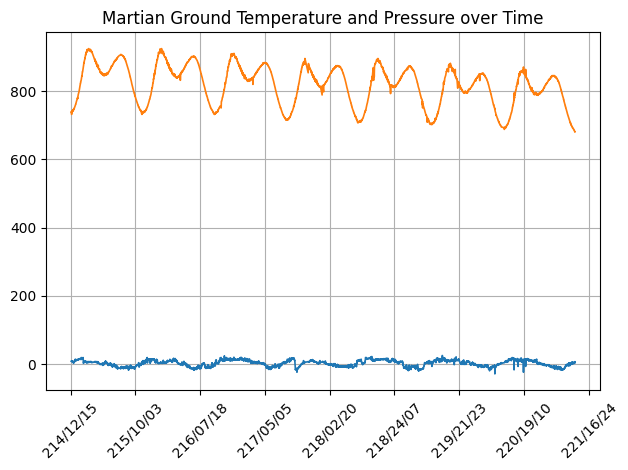

In [67]:
ax = merged.plot(
    x="darian_date",
    y=["ground_temperature_max", "pressure_current"],
    title="Martian Ground Temperature and Pressure over Time",
    grid=True,
    linewidth=1.2,
)
plt.xticks(rotation=45)
plt.tight_layout()  # prevents label cutoff
plt.show()




Conversion and serialization

In [68]:
# Convert to ordinals
ordinals = ground_temperature["darian_date"].to_numpy()
print("Numeric ordinals:", ordinals[:5])



Numeric ordinals: [143407. 143408. 143409. 143410. 143411.]


In [69]:
# Convert to strings
as_str = ground_temperature["darian_date"].astype(str)
print("String view:", as_str.head())



String view: 0    143407.0
1    143408.0
2    143409.0
3    143410.0
4    143411.0
Name: darian_date, dtype: object


compute time differences between consecutive rows

In [70]:
d = ground_sorted.index
diffs = np.diff([v.to_ordinal() for v in d])
print("Average sols between samples:", np.mean(diffs))



Average sols between samples: -1.0619166856362394


Example: resampling equivalent (manual for now)

MarsDate supports floor/ceil/round, so you can use them to create binning categories.

In [71]:
ground_temperature["darian_date"] = mdt.MarsDateArray([
    mdt.MarsDate.from_string(x) if isinstance(x, str) else x
    for x in ground_temperature["darian_date"]
])


In [72]:
col = ground_temperature["darian_date"]
print("dtype:", col.dtype)
print("type(col.array):", type(col.array))
print("sample:", col.iloc[0])


dtype: marsdate
type(col.array): <class 'mars_dtc.pandas_ext.MarsDateArray'>
sample: 214/12/22


In [73]:
# Vectorized floor across the whole column
ground_temperature["month_floor"] = ground_temperature["darian_date"].array.floor("month")

# Group by the floored month
monthly_group = (
    ground_temperature.groupby("month_floor")["ground_temperature_max"]
    .mean()
    .reset_index()
)

monthly_group.head()


,month_floor,ground_temperature_max
0,214/12/01,8.333333
1,214/13/01,6.708333
2,214/14/01,11.821429
3,214/15/01,14.607143
4,214/16/01,14.321429


## Matplotlib

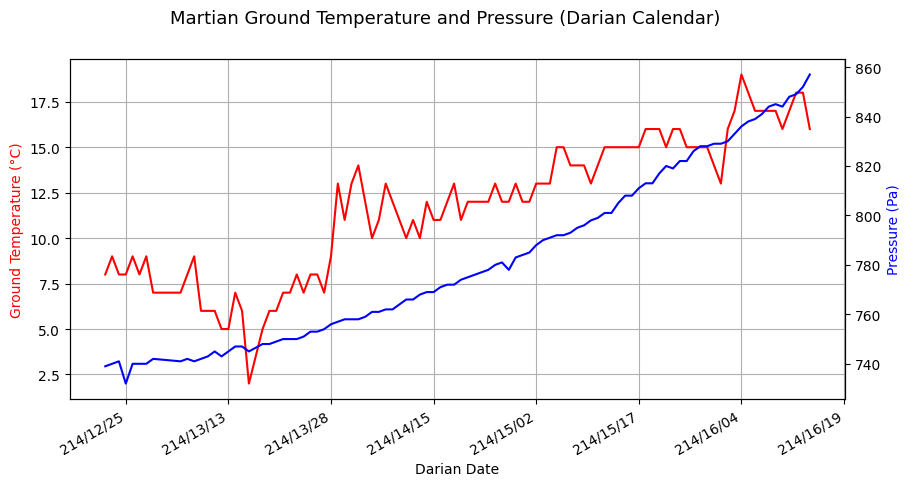

In [74]:
# simple subset
subset = merged.head(100).copy()

x = subset["darian_date"].array
y_temp = subset["ground_temperature_max"]
y_pressure = subset["pressure_current"]

# Create figure and plot
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(x, y_temp, color="red", label="Ground Temperature (°C)")
ax1.set_xlabel("Darian Date")
ax1.set_ylabel("Ground Temperature (°C)", color="red")

ax2 = ax1.twinx()
ax2.plot(x, y_pressure, color="blue", label="Pressure (Pa)")
ax2.set_ylabel("Pressure (Pa)", color="blue")

ax1.grid(True)
fig.suptitle("Martian Ground Temperature and Pressure (Darian Calendar)", fontsize=13)

fig.autofmt_xdate()
plt.show()


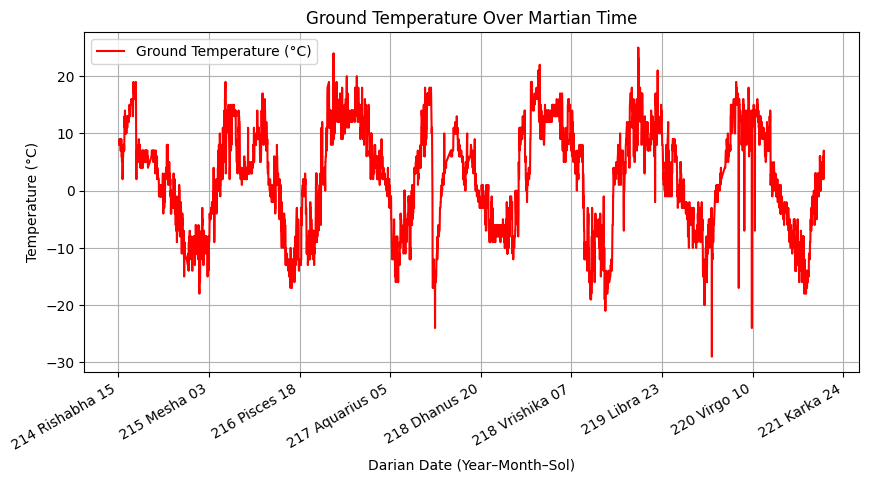

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(
    merged["darian_date"],
    merged["ground_temperature_max"],
    color="red",
    label="Ground Temperature (°C)"
)

def marsdate_formatter(x, pos):
    if np.isnan(x):
        return "NaT"
    d = mdt.MarsDate.from_ordinal(int(x))

    return f"{d.year} {d.calendar.month_name(d.month)} {d.sol:02d}"

ax.xaxis.set_major_formatter(FuncFormatter(marsdate_formatter))

ax.set_title("Ground Temperature Over Martian Time", fontsize=12)
ax.set_xlabel("Darian Date (Year–Month–Sol)")
ax.set_ylabel("Temperature (°C)")
ax.grid(True)
ax.legend()
fig.autofmt_xdate()

fig.savefig("mars_ground_temperature.png", dpi=300, bbox_inches="tight")

plt.show()

